<a href="https://colab.research.google.com/github/Joshmi-K-Joy/data-analytics-lab/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import required libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Define binary patterns for letters A, B, C

In [9]:
def get_letter_patterns():
    A = np.array([
        [0,1,1,1,0,0],
        [1,0,0,0,1,0],
        [1,1,1,1,1,0],
        [1,0,0,0,1,0],
        [1,0,0,0,1,0]
    ]).flatten()

    B = np.array([
        [1,1,1,0,0,0],
        [1,0,0,1,0,0],
        [1,1,1,0,0,0],
        [1,0,0,1,0,0],
        [1,1,1,0,0,0]
    ]).flatten()

    C = np.array([
        [0,1,1,1,0,0],
        [1,0,0,0,1,0],
        [1,0,0,0,0,0],
        [1,0,0,0,1,0],
        [0,1,1,1,0,0]
    ]).flatten()

    labels = {
        'A': [1, 0, 0],
        'B': [0, 1, 0],
        'C': [0, 0, 1]
    }

    return np.array([A, B, C]), np.array([labels['A'], labels['B'], labels['C']])


# Step 3: Define activation functions

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# Step 4: Network parameters

In [11]:
input_size = 30
hidden_size = 10
output_size = 3
learning_rate = 0.5
epochs = 1000

np.random.seed(1)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))


# Step 5: Training loop

In [12]:
inputs, targets = get_letter_patterns()
losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(inputs)):
        x = inputs[i].reshape(1, -1)
        y = targets[i].reshape(1, -1)

        hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)

        loss = np.mean((y - final_output) ** 2)
        total_loss += loss

        error = y - final_output
        d_output = error * sigmoid_derivative(final_output)

        error_hidden = d_output.dot(weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(hidden_output)

        weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
        bias_output += d_output * learning_rate

        weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        bias_hidden += d_hidden * learning_rate

    losses.append(total_loss / len(inputs))


# Step 6: Plot training loss

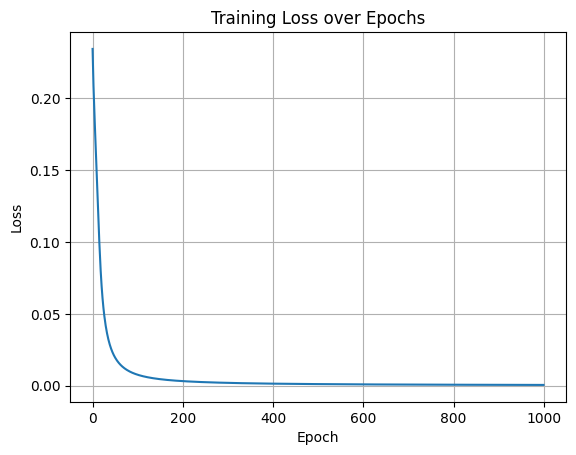

In [13]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Step 7: Prediction functions

In [14]:
def predict(image):
    hidden = sigmoid(np.dot(image, weights_input_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden, weights_hidden_output) + bias_output)
    return output

def show_image(img_vector, label_pred):
    plt.imshow(img_vector.reshape(5,6), cmap='gray_r')
    plt.title(f"Predicted Letter: {label_pred}")
    plt.axis('off')
    plt.show()


# Step 8: Display predictions

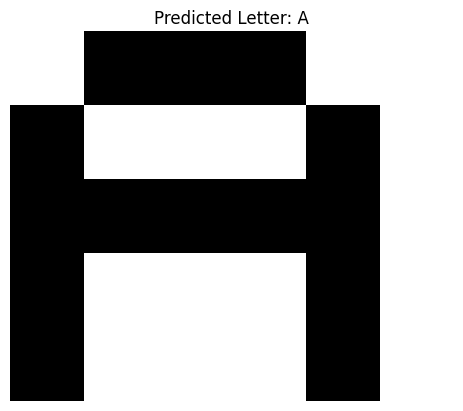

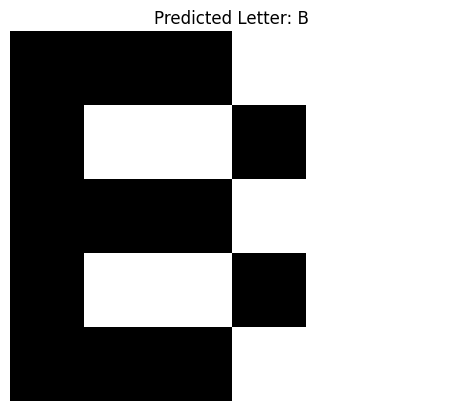

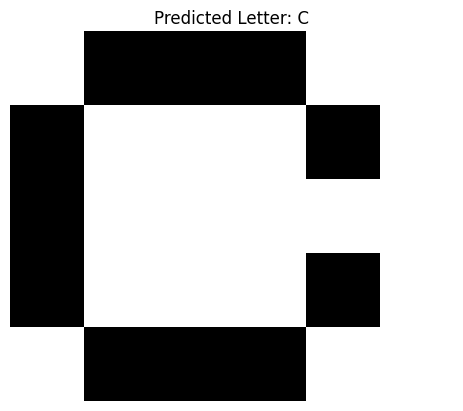

In [15]:
index_to_letter = ['A', 'B', 'C']

for i in range(len(inputs)):
    out = predict(inputs[i].reshape(1, -1))
    predicted_label = index_to_letter[np.argmax(out)]
    show_image(inputs[i], predicted_label)
